In [1]:
## Import statement: pandas is a "package"
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import statsmodels.formula.api as smf


In [2]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [3]:
from sklearn.datasets import make_blobs ### easy way to make clusters


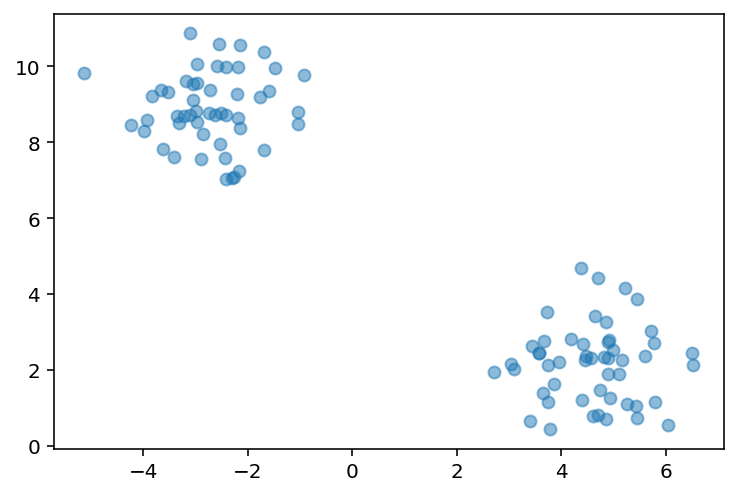

In [4]:
X, y = make_blobs(n_samples=100, centers=2, random_state=42)
plt.scatter(X[:, 0], X[:, 1], alpha = .5)

In [5]:
K = 2


In [6]:
labels = np.random.randint(K, size = len(X))

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1])

<AxesSubplot:>

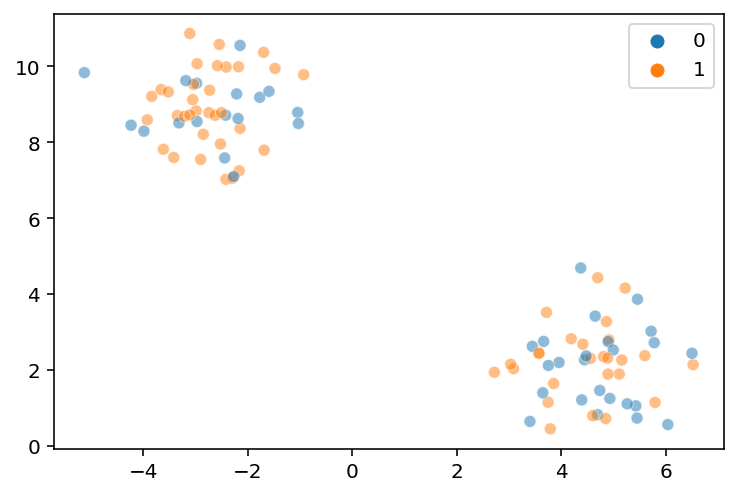

In [7]:
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = labels, alpha = .5)

In [8]:
c1_mean = X[labels==0].mean(axis=0)
c1_mean

array([1.6888309 , 4.89477664])

In [9]:
c2_mean = X[labels==1].mean(axis=0)
c2_mean

array([0.44122041, 5.97150851])

<AxesSubplot:>

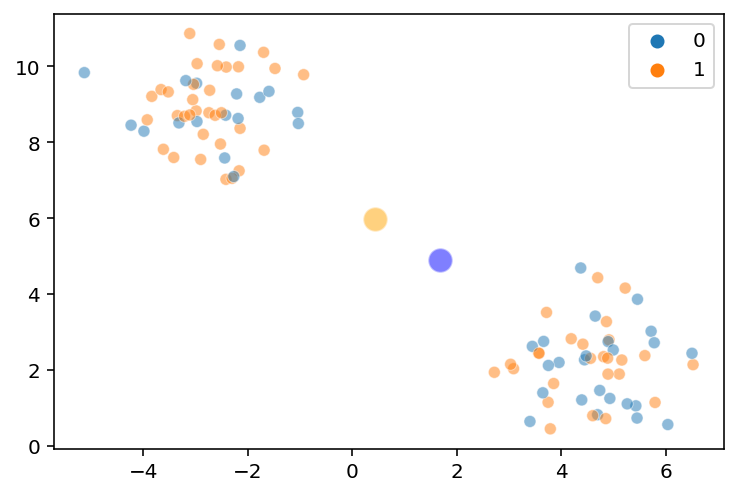

In [10]:
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = labels, alpha = .5)
sns.scatterplot(x = [c1_mean[0]], y = [c1_mean[1]], color = "blue", s = 150, alpha = .5)
sns.scatterplot(x = [c2_mean[0]], y = [c2_mean[1]], color = "orange", s = 150, alpha = .5)

In [11]:
from scipy.spatial.distance import euclidean

In [12]:
d_c1 = [euclidean(i, c1_mean)**2 for i in X]
d_c2 = [euclidean(i, c2_mean)**2 for i in X]

In [15]:
new_labels = []
for index, point in enumerate(X):
    ### compare distance to c1 vs. c2
    if d_c1[index] < d_c2[index]:
        new_labels.append(0)
    else:
        new_labels.append(1)
new_labels = np.array(new_labels)

<AxesSubplot:>

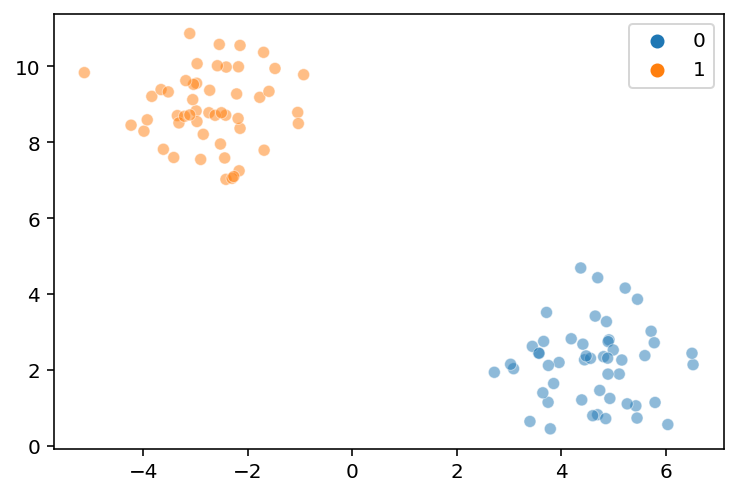

In [17]:
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = new_labels, alpha = .5)


In [18]:
c1_mean = X[new_labels==0].mean(axis=0)
c2_mean = X[new_labels==1].mean(axis=0)
print("Cluster 1 mean: {x}".format(x = c1_mean))
print("Cluster 2 mean: {x}".format(x = c2_mean))

Cluster 1 mean: [4.60840443 2.16998192]
Cluster 2 mean: [-2.70292301  8.89011496]


<AxesSubplot:>

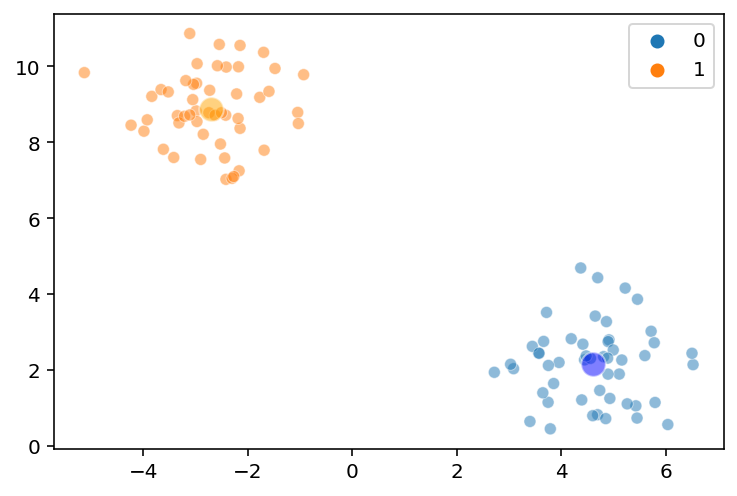

In [19]:
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = new_labels, alpha = .5)
sns.scatterplot(x = [c1_mean[0]], y = [c1_mean[1]], color = "blue", s = 150, alpha = .5)
sns.scatterplot(x = [c2_mean[0]], y = [c2_mean[1]], color = "orange", s = 150, alpha = .5)

In [20]:
from sklearn.cluster import KMeans


In [21]:
k = KMeans(n_clusters = K)
kmeans_labels = k.fit_predict(X)

<AxesSubplot:>

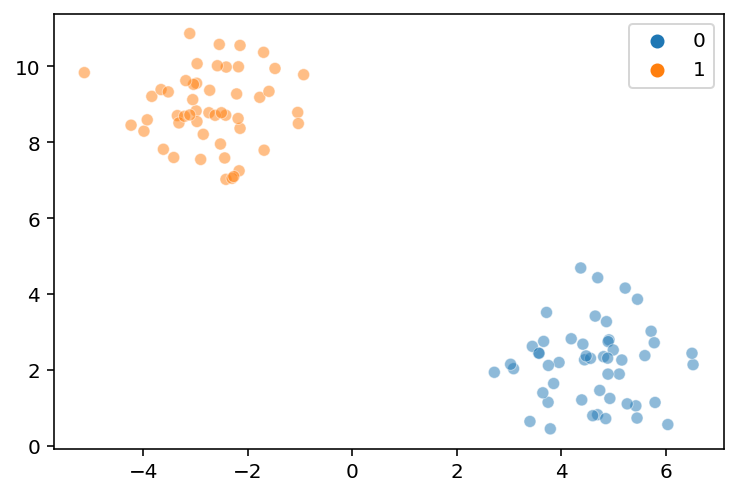

In [22]:
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = kmeans_labels, alpha = .5)


In [44]:
X[:,1]

array([ 8.82862715,  3.02697174,  9.12520872,  3.86996267,  3.28031244,
       10.55232269,  2.80035293,  2.04173266,  7.55077118,  8.70507375,
        7.58953794,  0.65271307,  9.55684617,  9.21114736,  2.20542338,
        1.65110817,  4.4364118 ,  2.4556421 ,  0.83019939,  7.02671721,
        0.72743091,  2.27471703,  1.06378223,  2.38595061,  2.75499256,
        9.78172086,  2.31432166, 10.37052616,  2.27015436,  4.69333885,
        8.78014917,  8.29444192,  9.38998415,  8.78850983,  7.25124597,
        4.16362531,  2.35848706,  9.98983126,  8.51252908,  7.054616  ,
        9.18565441,  0.74230537,  2.76025429,  1.90034077,  1.21943352,
        8.49601591, 10.57892978,  9.2753414 ,  7.8180795 ,  2.62972329,
        3.42670376,  8.4519986 ,  8.54855637,  2.53395421,  7.10100588,
        1.11601213,  9.98293112,  1.89872377,  1.1573594 ,  8.36916637,
        8.71527878,  2.68717018,  9.52755356,  1.94665581,  1.15248737,
        2.12689479,  2.1477475 ,  8.59364081,  2.15780354,  2.31

In [31]:
k = KMeans(n_clusters = 10)
kmeans_labels = k.fit_predict(X)

<AxesSubplot:>

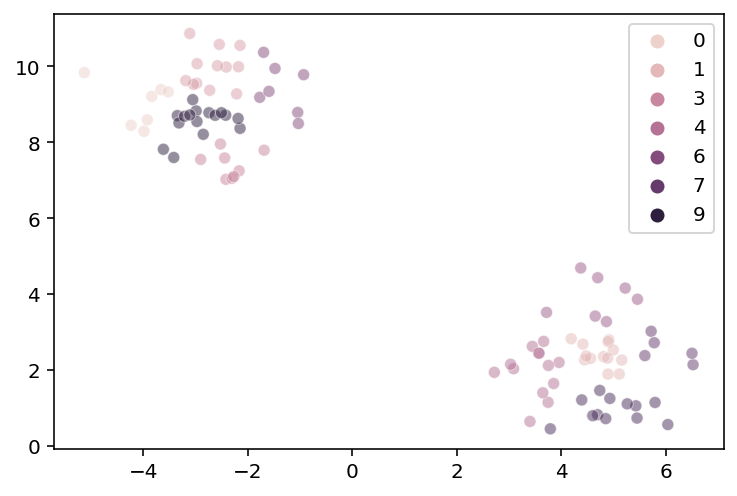

In [32]:
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = kmeans_labels, alpha = .5)


<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

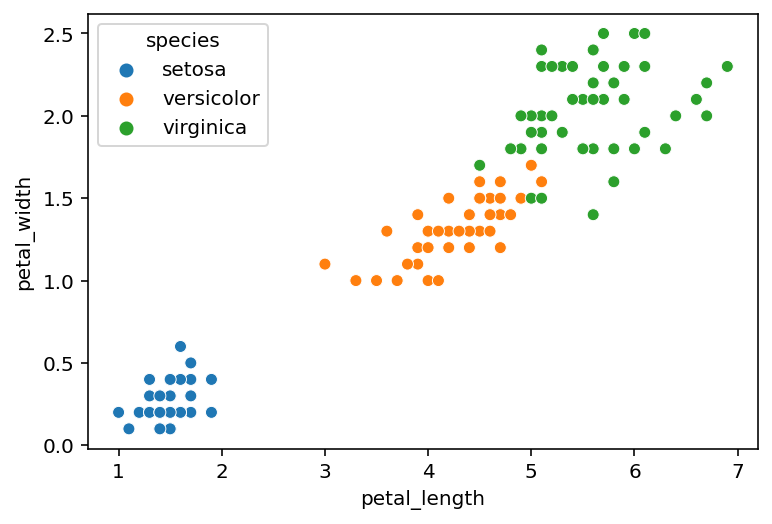

In [33]:
df_iris = sns.load_dataset("iris")
sns.scatterplot(data = df_iris, x = "petal_length", y = "petal_width", hue = "species")

In [35]:
features = df_iris[['petal_length', 'petal_width']].values


In [45]:
km = KMeans(n_clusters=3)
labels = km.fit_predict(features)

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

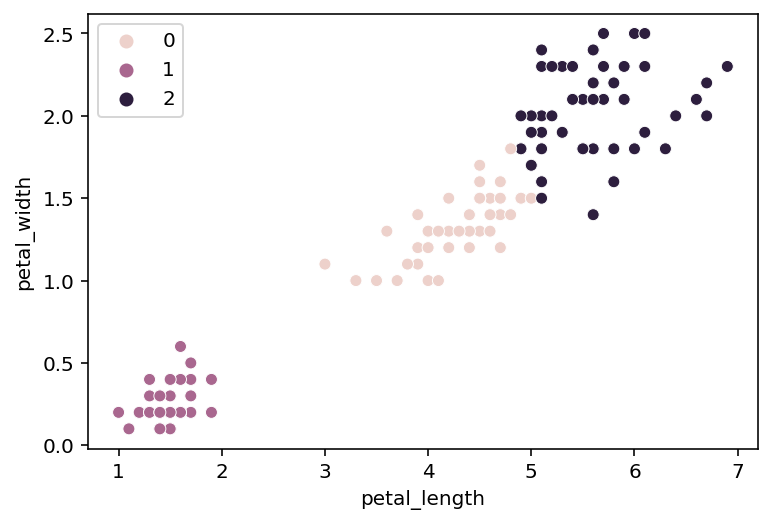

In [48]:
sns.scatterplot(data = df_iris, x = "petal_length", y = "petal_width", hue = labels)